Имамутдинов Артур 09-235 exercise 2p2 2.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from pymystem3 import Mystem
import re

from sklearn import metrics

dataset taken from [SMS SPAM COLLECTION](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [ ]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df.iloc[:,1]
y = df.iloc[:,0]

In [ ]:
print('Ham : ',len(y[y=='ham']), ' Spam: ',len(y[y=='spam']))

Ham :  4825  Spam:  747


Getting train and test selection

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

Converting sentences into words in the infinitive

In [ ]:
def lemmatize_sentence(text):
    lemmas=m.lemmatize(text)
    return "".join(lemmas).strip()

m = Mystem()

In [ ]:
def get_words(fulltext):
  words = []
  for data in fulltext:
    doc = lemmatize_sentence(data)
    tokens_data=re.split(r'[-\s\n\t-:\[\]<>\'.,;!?()" ]+',doc)
    for token_data in tokens_data:
      if token_data not in words:
        words.append(token_data)
  return words

In [ ]:
ham_train = get_words(X_train[y_train=='ham'])
spam_train = get_words(X_train[y_train=='spam'])

Creating dataset

In [ ]:
dataset = []

In [ ]:
def update_dataset(dataset,data_class,num_class):
    for data in data_class:

        doc = lemmatize_sentence(data.lower())
        tokens_data=re.split(r'[-\s\n\t-:\[\]<>\'.,;!?()"\\\\\'\"]+',doc)

        for token_data in tokens_data:
            if(len(token_data)>3):
                dataset.append([token_data,num_class])

In [ ]:
update_dataset(dataset,ham_train,0)
update_dataset(dataset,spam_train,1)

In [ ]:
dataset

[['reading', 0],
 ['habit', 0],
 ['bari', 0],
 ['hudgi', 0],
 ['yorge', 0],
 ['pataistha', 0],
 ['ertini', 0],
 ['kano', 0],
 ['laptop', 0],
 ['take', 0],
 ['with', 0],
 ['hope', 0],
 ['your', 0],
 ['burns', 0],
 ['tonite', 0],
 ['dont', 0],
 ['talk', 0],
 ['ever', 0],
 ['word', 0],
 ['found', 0],
 ['diff', 0],
 ['farm', 0],
 ['shop', 0],
 ['some', 0],
 ['cheese', 0],
 ['back', 0],
 ['call', 0],
 ['dunno', 0],
 ['until', 0],
 ['when', 0],
 ['lets', 0],
 ['learn', 0],
 ['pilates', 0],
 ['will', 0],
 ['really', 0],
 ['pretty', 0],
 ['late', 0],
 ['want', 0],
 ['lesson', 0],
 ['first', 0],
 ['join', 0],
 ['only', 0],
 ['reaching', 0],
 ['look', 0],
 ['well', 0],
 ['know', 0],
 ['take', 0],
 ['care', 0],
 ['worries', 0],
 ['wats', 0],
 ['problem', 0],
 ['cool', 0],
 ['kappa', 0],
 ['should', 0],
 ['meet', 0],
 ['outside', 0],
 ['just', 0],
 ['sent', 0],
 ['email', 0],
 ['address', 0],
 ['with', 0],
 ['incomm', 0],
 ['that', 0],
 ['right', 0],
 ['every', 0],
 ['sleep', 0],
 ['after', 0],
 [

In [ ]:
len(dataset)

8111

Naive bayes classifier

In [ ]:
# обучение
def fit (dataset, alpha):
    classes, freq, tot_in_cl, total = {}, {}, {}, set()
    for feature, label in dataset:
        if label not in classes:
            classes[label] = 0
            tot_in_cl[label] = 0
        classes[label] += 1

        if (feature,label) not in freq:
            freq[(feature,label)] = 0
        freq[(feature,label)] += 1
        tot_in_cl[label] += 1
        total.add(feature)

    # перевод на язык вероятностей
    # частоты слов
    for feature,label in freq:
        freq[(feature,label)] = ((alpha + freq[(feature,label)] ) /  (alpha * len(total) + tot_in_cl[label]) )

    # частоты классов
    for cl in classes:
        classes[cl] /= len(dataset)


    return alpha,classes, freq, tot_in_cl, len(total)

def predict(classifier , features):
    alpha, classes, freq, tot_in_cl, len_total = classifier
    # лямбда функция
    return max(classes.keys(),
              key = lambda cl:
              np.log10(classes[cl]) +
                sum(np.log10(freq.get((feature,cl), alpha/(alpha*len_total+tot_in_cl[cl])) )  \
                  for feature in features ))

In [ ]:
fit(dataset,1)

(1,
 {0: 0.7574898286277895, 1: 0.24251017137221056},
 {('reading', 0): 0.0002482827112472068,
  ('habit', 0): 0.0002482827112472068,
  ('bari', 0): 0.00016552180749813787,
  ('hudgi', 0): 0.00016552180749813787,
  ('yorge', 0): 0.00016552180749813787,
  ('pataistha', 0): 0.00016552180749813787,
  ('ertini', 0): 0.00016552180749813787,
  ('kano', 0): 0.00016552180749813787,
  ('laptop', 0): 0.0002482827112472068,
  ('take', 0): 0.0004138045187453447,
  ('with', 0): 0.00033104361499627574,
  ('hope', 0): 0.00033104361499627574,
  ('your', 0): 0.00033104361499627574,
  ('burns', 0): 0.00016552180749813787,
  ('tonite', 0): 0.0002482827112472068,
  ('dont', 0): 0.0002482827112472068,
  ('talk', 0): 0.00033104361499627574,
  ('ever', 0): 0.00033104361499627574,
  ('word', 0): 0.00016552180749813787,
  ('found', 0): 0.0002482827112472068,
  ('diff', 0): 0.00016552180749813787,
  ('farm', 0): 0.0002482827112472068,
  ('shop', 0): 0.0002482827112472068,
  ('some', 0): 0.0002482827112472068,
 

In [ ]:
model = fit(dataset,1)

Making predict by preprocessed X_test

In [ ]:
def infinitive(sentence):
  res = []
  for data in sentence:
    doc = lemmatize_sentence(data.lower())
    token_data=re.split(r'[-\s\n\t-:\[\]<>\'.,;!?()"\\\\\'\"]+',doc)
    if len(token_data[0])>3:
      res += token_data
  return res

In [ ]:
y_pred = []
for data in X_test:
  test_data = get_words([data])
  #print(test_data)
  #print(infinitive(test_data))
  y_pred += [predict(model,infinitive(test_data))]

Transforming each cell in y_test by ham=0 spam=1

In [ ]:
def y_transform(y):
  y_res=[]
  for y_i in y:
    if y_i=='ham':
      y_res+=[0]
    else:
      y_res+=[1]
  return y_res

In [ ]:
y_test_transformed = y_transform(y_test)

Since the classes are unbalanced, we calculate the f measure

In [ ]:
len(y_test_transformed)

1115

In [ ]:
len(y_pred)

1115

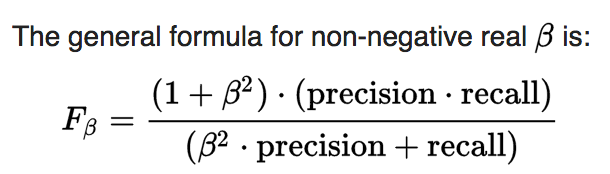

In [ ]:
def evaluate_model(y_predict, y_test,lyambda):
    acc = metrics.accuracy_score(y_test, y_predict)
    prec_sc = metrics.precision_score(y_test, y_predict, average='weighted',zero_division=0)
    rec_sc = metrics.recall_score(y_test, y_predict, average= 'weighted',zero_division=0)
    print("Accuracy: ", acc,
          "\nPrecision: ", prec_sc,
          "\nRecall: ", rec_sc,
          "\nF-measure: ", (1+lyambda**2)*(prec_sc*rec_sc)/((lyambda**2)*prec_sc+rec_sc))

In [ ]:
evaluate_model(y_pred,y_test_transformed,1)

Accuracy:  0.8995515695067264 
Precision:  0.9409460043224731 
Recall:  0.8995515695067264 
F-measure:  0.9197832880033053
